<a href="https://www.kaggle.com/code/yorkyong/car-price-prediction-xgboost-catboost?scriptVersionId=156786539" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import helpful libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# Load the train data for EDA
file_path = '/kaggle/input/autoam-car-price-prediction/train.csv'
df = pd.read_csv(file_path)

# **Step 1: Understanding the Data**

In [3]:
df.shape

(1642, 10)

In [4]:
df.head()

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [5]:
df.columns

Index(['model', 'year', 'motor_type', 'running', 'wheel', 'color', 'type',
       'status', 'motor_volume', 'price'],
      dtype='object')

In [6]:
df.dtypes

model            object
year              int64
motor_type       object
running          object
wheel            object
color            object
type             object
status           object
motor_volume    float64
price             int64
dtype: object

In [7]:
#Running column is an object and seems to have miles and km, there is a need to treat this feature before using XGBoost

In [8]:
df.describe()

,year,motor_volume,price
count,1642.000000,1642.000000,1642.000000
mean,2014.805725,2.035018,15982.633374
std,6.587573,0.253069,7176.084647
min,1987.000000,0.200000,462.000000
25%,2013.000000,2.000000,12000.000000
50%,2017.000000,2.000000,15750.000000
75%,2019.000000,2.000000,18500.000000
max,2023.000000,4.000000,87000.000000


In [9]:
df.describe(include=['O'])

,model,motor_type,running,wheel,color,type,status
count,1642,1642,1642,1642,1642,1642,1642
unique,5,5,643,1,17,7,5
top,mercedes-benz,petrol,300000 km,left,black,sedan,excellent
freq,402,1420,19,1642,541,1276,1200


# **Step 2: Data Preparation**

In [10]:
df.isna().sum()

model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64

In [11]:
df.loc[df.duplicated()]

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
500,toyota,2014,petrol,42000 miles,left,silver,sedan,excellent,1.8,16000
917,nissan,2019,petrol,49000 miles,left,gray,suv,excellent,2.0,23200
918,kia,2020,petrol,60000 miles,left,silver,sedan,excellent,2.0,19000
922,mercedes-benz,2007,petrol and gas,280000 km,left,black,sedan,good,2.0,12000
1137,kia,2020,petrol,60000 miles,left,silver,sedan,excellent,2.0,19000
1198,hyundai,2018,petrol,90000 miles,left,black,sedan,excellent,2.0,12500
1477,hyundai,2019,petrol,75000 miles,left,black,sedan,excellent,2.0,15500
1543,hyundai,2022,petrol,5000 km,left,black,sedan,excellent,2.0,15750
1581,hyundai,2020,petrol,128000 km,left,white,sedan,excellent,2.0,14500


In [12]:
# Checking an example duplicate
df.query('price == 16000')

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
89,nissan,2016,petrol,97500 miles,left,black,suv,good,2.5,16000
163,hyundai,2019,petrol,50400 miles,left,silver,sedan,excellent,2.0,16000
175,toyota,2014,petrol,42000 miles,left,silver,sedan,excellent,1.8,16000
194,toyota,2017,petrol,130000 miles,left,blue,sedan,excellent,1.8,16000
239,kia,2018,petrol,42000 miles,left,blue,sedan,excellent,2.0,16000
354,toyota,2015,petrol,137000 km,left,black,sedan,excellent,2.0,16000
430,kia,2019,petrol,44000 km,left,cherry,sedan,excellent,1.6,16000
441,mercedes-benz,2013,petrol,185000 km,left,black,sedan,excellent,1.8,16000
471,hyundai,2019,petrol,90000 miles,left,black,sedan,excellent,2.0,16000
473,nissan,2018,petrol,82000 km,left,gray,suv,excellent,2.0,16000


In [13]:
#dropping duplicated rows
df = df.loc[~df.duplicated()] \
    .reset_index(drop=True).copy()
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1628,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1629,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1630,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1631,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500


In [14]:
df.loc[df.duplicated()]

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price


In [15]:
import re

# Function to convert distances to kilometers
def convert_to_km(distance):
    # Extract numerical value and unit using regular expression
    value, unit = re.match(r'(\d+)\s*([a-zA-Z]+)', distance).groups()
    
    # Convert miles to kilometers if the unit is 'miles'
    if unit.lower() == 'miles':
        return float(value) * 1.60934
    else:
        return float(value)

# Apply the conversion function to the 'running' column
df['running_km'] = df['running'].apply(convert_to_km)

In [16]:
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,running_km
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500,3000.000
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500,132000.000
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700,152887.300
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000,220479.580
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000,130000.000
...,...,...,...,...,...,...,...,...,...,...,...
1628,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400,193120.800
1629,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500,170000.000
1630,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500,110883.526
1631,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500,49889.540


In [17]:
df.describe()

,year,motor_volume,price,running_km
count,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,2014.789957,2.035334,15980.424985,1.192440e+05
std,6.594568,0.253688,7191.552191,9.689066e+04
min,1987.000000,0.200000,462.000000,1.000000e+01
25%,2013.000000,2.000000,11950.000000,5.632690e+04
50%,2017.000000,2.000000,15750.000000,9.900000e+04
75%,2019.000000,2.000000,18500.000000,1.609340e+05
max,2023.000000,4.000000,87000.000000,1.251708e+06


# **Step 3: Feature Understanding**

In [18]:
df['model'].value_counts()

model
mercedes-benz    401
nissan           349
hyundai          347
kia              283
toyota           253
Name: count, dtype: int64

In [19]:
df['year'].value_counts()

year
2019    264
2017    259
2018    230
2020    127
2016    109
2021     57
2015     53
2012     51
2014     51
2022     47
2013     43
2011     42
2008     39
1998     32
2007     26
2010     25
1995     24
2001     20
1997     19
2009     16
1996     15
2000     13
2023     10
2002     10
2005     10
1999      9
2006      9
2003      8
2004      6
1994      5
1993      3
1987      1
Name: count, dtype: int64

In [20]:
df['motor_type'].value_counts()

motor_type
petrol            1412
gas                165
petrol and gas      53
diesel               2
hybrid               1
Name: count, dtype: int64

In [21]:
df['wheel'].value_counts()

wheel
left    1633
Name: count, dtype: int64

In [22]:
#We can drop wheel as a feature since it does not add value as it is 100% one variable

In [23]:
df['color'].value_counts()

color
black      537
white      406
silver     220
gray       188
blue       141
red         47
other       30
cherry      20
green       10
brown       10
golden       6
orange       5
beige        5
clove        3
purple       2
skyblue      2
pink         1
Name: count, dtype: int64

In [24]:
df['type'].value_counts()

type
sedan                1268
suv                   300
Universal              37
hatchback              15
Coupe                  11
pickup                  1
minivan / minibus       1
Name: count, dtype: int64

In [25]:
df['status'].value_counts()

status
excellent    1192
good          333
normal         58
crashed        29
new            21
Name: count, dtype: int64

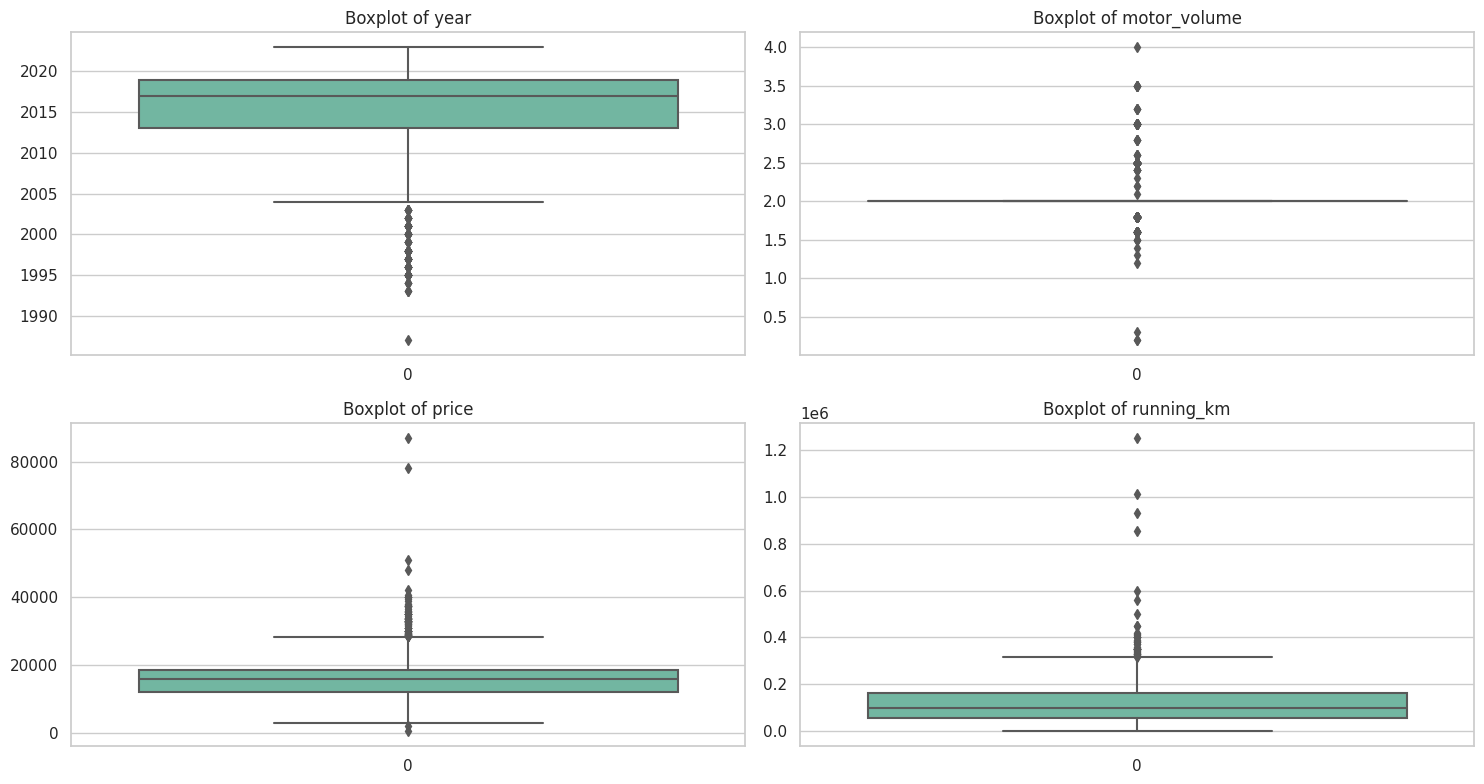

In [26]:
# Set the style of the plot
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Manually specify the columns for the boxplot
columns_to_plot = ['year', 'motor_volume', 'price', 'running_km']

# Create separate subplots for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[col], palette="Set2")
    plt.title(f'Boxplot of {col}')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

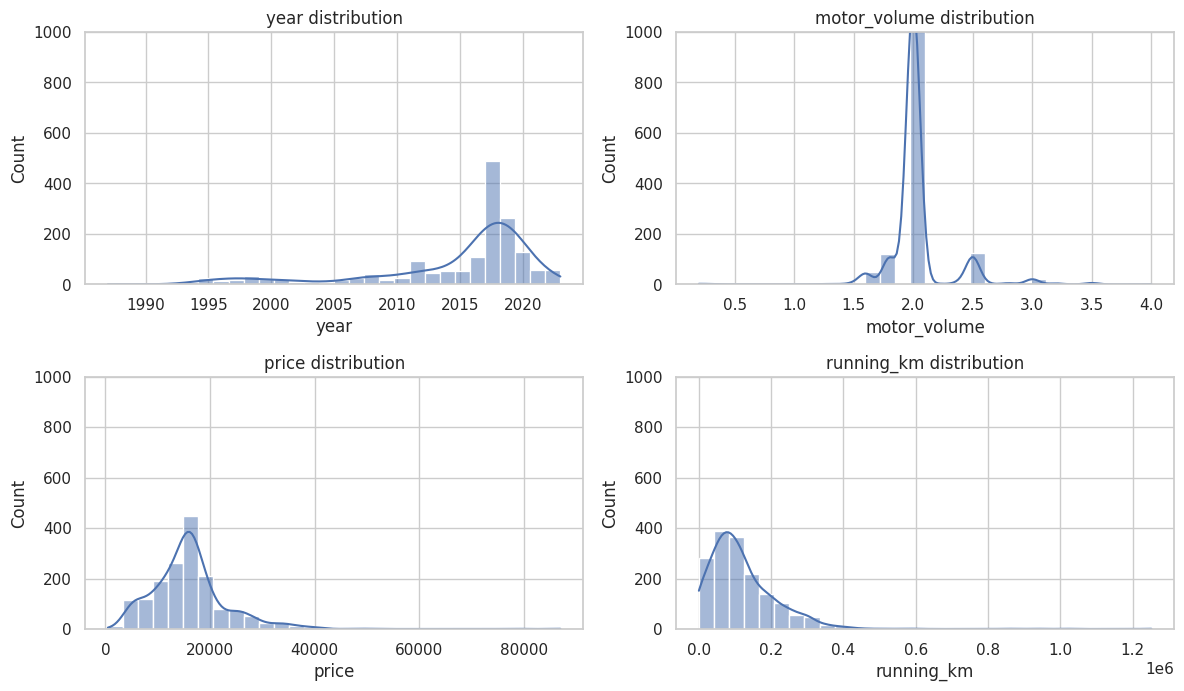

In [27]:
exp_cols = ["year","motor_volume","price","running_km"]
plt.figure(figsize=(12,10))
for i, column in enumerate(exp_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.ylim(0, 1000)
    plt.tight_layout()

# **Step 4: Feature Relationships**

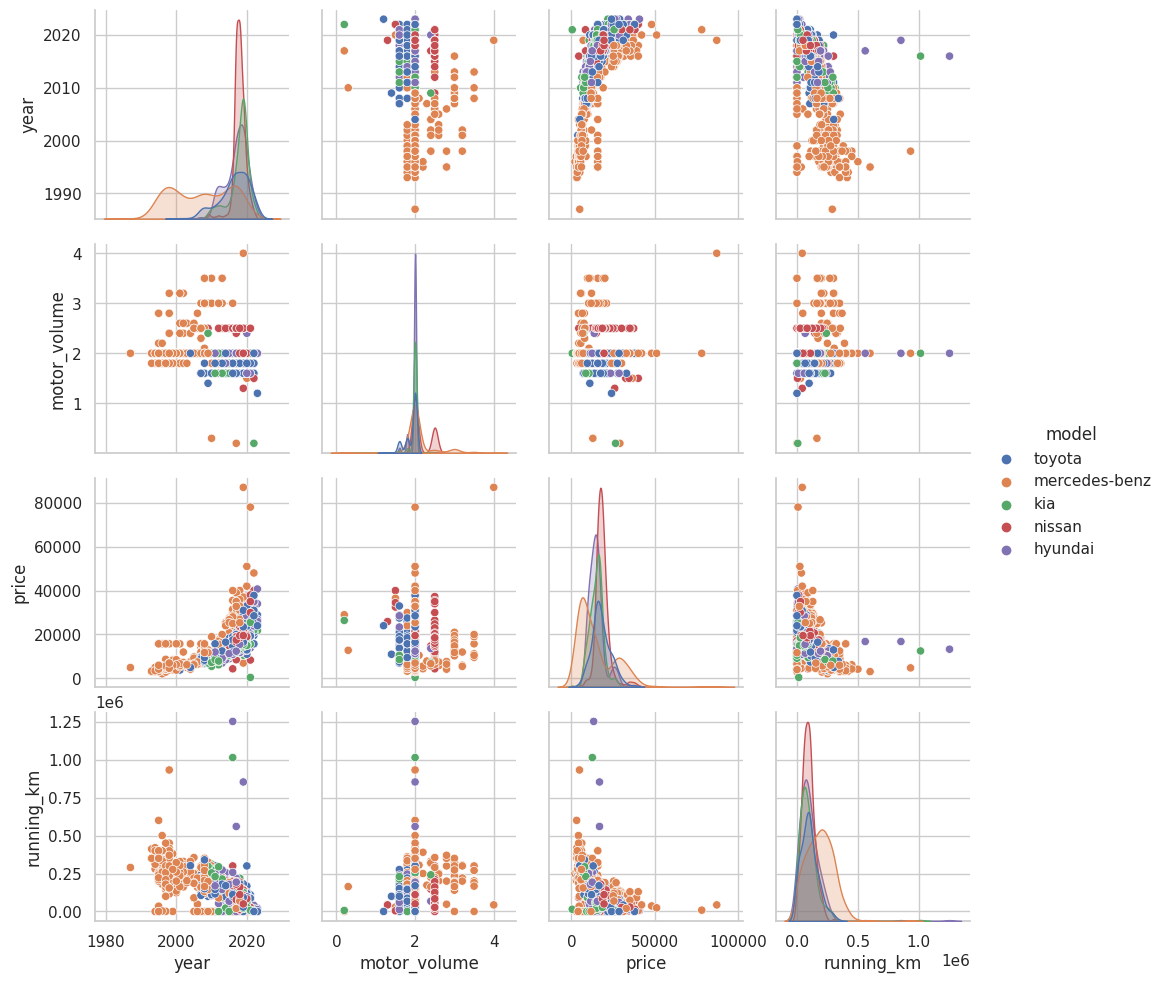

In [28]:
sns.pairplot(df,
             vars=['year','motor_volume','price','running_km'],
            hue='model')
plt.show()

<Axes: >

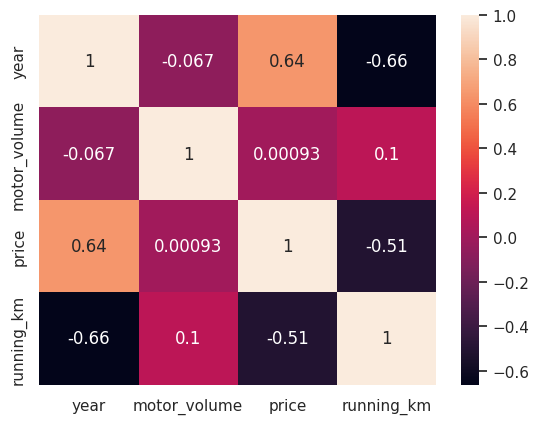

In [29]:
df_corr = df[['year','motor_volume','price','running_km']].dropna().corr()
sns.heatmap(df_corr, annot=True)

In [30]:
#Seems like only Year - Price has somewhat a positive corelation.
# Year - running_km as well a negative relationship which makes sense (i.e. older the vehicle the more the running_km)


In [31]:
df

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price,running_km
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500,3000.000
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500,132000.000
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700,152887.300
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000,220479.580
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000,130000.000
...,...,...,...,...,...,...,...,...,...,...,...
1628,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400,193120.800
1629,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500,170000.000
1630,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500,110883.526
1631,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500,49889.540


# **Step 5: Apply XGBoost**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [33]:
#Load the training and validation sets in X_train, X_valid, y_train, and y_valid. The test set is loaded in X_test.

from sklearn.model_selection import train_test_split

# Read the data
X = df
X_test_full = pd.read_csv('/kaggle/input/autoam-car-price-prediction/test.csv')


In [34]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['price'], inplace=True)
y = X.price            
X.drop(['price'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

In [35]:
#Preprocess test data in same way as X = df
X_test_full.loc[X_test_full.duplicated()]

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume


In [36]:
# Apply the conversion function to the 'running' column
X_test_full['running_km'] = X_test_full['running'].apply(convert_to_km)
X_test_full.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume,running_km
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0,24000.00
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0,136793.90
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0,48280.20
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0,85295.02
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8,230000.00


In [37]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
#low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        #X_train_full[cname].dtype == "object"]
#low_cardinality_cols

In [38]:
# Select numeric columns
#numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
#numeric_cols

In [39]:
#Select Columns for use based on analysis in https://www.kaggle.com/code/shashwatpatel/car-price-prediction-using-catboost
#Feature engineering Run/Year also based on analysis in https://www.kaggle.com/code/shashwatpatel/car-price-prediction-using-catboost

X_train_full['run_per_year']=X_train_full['running_km']/(2024-X_train_full['year'])
X_valid_full['run_per_year']=X_valid_full['running_km']/(2024-X_valid_full['year'])
X_test_full['run_per_year']=X_test_full['running_km']/(2024-X_test_full['year'])

my_cols = ['model','motor_type','color','type','status','year','running_km','run_per_year']

In [40]:
# Keep selected columns only
#my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [41]:
# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

**Default Run**

* Begin by setting my_model_1 to an XGBoost model. Use the XGBRegressor class, and set the random seed to 0 (random_state=0). Leave all other parameters as default.
* Then, fit the model to the training data in X_train and y_train.

In [42]:
from xgboost import XGBRegressor

# Define the model
my_model_1 = XGBRegressor(random_state=0)

# Fit the model

my_model_1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [43]:
#Obtain run 1 result
from sklearn.metrics import mean_absolute_error

# Get predictions
predictions_1 = my_model_1.predict(X_valid)

# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, y_valid)

#Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

Mean Absolute Error: 2691.6186784750093


**Improved Run**

* Begin by setting my_model_2 to an XGBoost model, using the XGBRegressor class. Change the default parameters (like n_estimators and learning_rate) to get better results.
* Then, fit the model to the training data in X_train and y_train.
* Set predictions_2 to the model's predictions for the validation data. Validation features are stored in X_valid.
* Finally, use the mean_absolute_error() function to calculate the mean absolute error (MAE) corresponding to the predictions on the validation set. Labels for the validation data are stored in y_valid.

In [44]:
# Define the model
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.04, n_jobs=4)

# Fit the model
my_model_2.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

# Get predictions
predictions_2 = my_model_2.predict(X_valid)

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_valid)

#Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 2150.4856755901187


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [45]:
#We use my_model_2 as final model

In [46]:
# Combine the training and validation sets
X_train_full = pd.concat([X_train, X_valid])
y_train_full = pd.concat([y_train, y_valid])

In [47]:
print(X_train_full.info())
print(y_train_full.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 1376 to 1325
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1633 non-null   int64  
 1   running_km                 1633 non-null   float64
 2   run_per_year               1633 non-null   float64
 3   model_hyundai              1633 non-null   bool   
 4   model_kia                  1633 non-null   bool   
 5   model_mercedes-benz        1633 non-null   bool   
 6   model_nissan               1633 non-null   bool   
 7   model_toyota               1633 non-null   bool   
 8   motor_type_diesel          1306 non-null   object 
 9   motor_type_gas             1633 non-null   bool   
 10  motor_type_hybrid          1306 non-null   object 
 11  motor_type_petrol          1633 non-null   bool   
 12  motor_type_petrol and gas  1633 non-null   bool   
 13  color_beige                1633 non-null   bool   

In [48]:
# Convert the boolean column to boolean type
X_train_full[['motor_type_diesel','motor_type_hybrid','color_golden','type_Coupe','type_minivan / minibus','type_pickup']] \
= X_train_full[['motor_type_diesel','motor_type_hybrid','color_golden','type_Coupe','type_minivan / minibus','type_pickup']]\
.astype(bool)


In [49]:
print(X_train_full.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, 1376 to 1325
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1633 non-null   int64  
 1   running_km                 1633 non-null   float64
 2   run_per_year               1633 non-null   float64
 3   model_hyundai              1633 non-null   bool   
 4   model_kia                  1633 non-null   bool   
 5   model_mercedes-benz        1633 non-null   bool   
 6   model_nissan               1633 non-null   bool   
 7   model_toyota               1633 non-null   bool   
 8   motor_type_diesel          1633 non-null   bool   
 9   motor_type_gas             1633 non-null   bool   
 10  motor_type_hybrid          1633 non-null   bool   
 11  motor_type_petrol          1633 non-null   bool   
 12  motor_type_petrol and gas  1633 non-null   bool   
 13  color_beige                1633 non-null   bool   

In [50]:
# Retrain the model on the combined training + validation data
my_model_2.fit(X_train_full, y_train_full)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# make predictions to submit.
test_preds = my_model_2.predict(X_test)

In [52]:
X_test.head()

,year,running_km,run_per_year,model_hyundai,model_kia,model_mercedes-benz,model_nissan,model_toyota,motor_type_diesel,motor_type_gas,...,type_hatchback,type_minivan / minibus,type_pickup,type_sedan,type_suv,status_crashed,status_excellent,status_good,status_new,status_normal
0,2020,24000.00,6000.000000,False,True,False,False,False,NaN,False,...,False,NaN,NaN,True,False,False,True,False,False,False
1,2017,136793.90,19541.985714,False,False,False,True,False,NaN,False,...,False,NaN,NaN,False,True,False,True,False,False,False
2,2021,48280.20,16093.400000,True,False,False,False,False,NaN,False,...,False,NaN,NaN,True,False,False,True,False,False,False
3,2018,85295.02,14215.836667,False,True,False,False,False,NaN,False,...,False,NaN,NaN,True,False,False,True,False,False,False
4,2003,230000.00,10952.380952,False,False,True,False,False,NaN,False,...,False,NaN,NaN,False,False,False,False,False,False,True


In [53]:
X_test_full.head()

,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume,running_km,run_per_year
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0,24000.00,6000.000000
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0,136793.90,19541.985714
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0,48280.20,16093.400000
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0,85295.02,14215.836667
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8,230000.00,10952.380952


In [54]:
X_test_full.shape

(411, 12)

In [55]:
#Save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': X_test_full.Id,
                       'Predicted_Price': test_preds})
output.to_csv('submission.csv', index=False)

In [56]:
output.shape

(411, 2)

In [57]:
output.head()

,Id,Predicted_Price
0,0,17173.150391
1,1,16854.843750
2,2,24027.373047
3,3,14172.456055
4,4,14044.627930


# **Step 6: Fine-tune Model**

with reference from: https://www.kaggle.com/code/yashusinghal/catboostregressor-how-to-improve-currently-at-4th

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [59]:
gb_regressor = GradientBoostingRegressor(criterion = "mae")
model = CatBoostRegressor(loss_function='MAE', silent = True)
rf_regressor = RandomForestRegressor()
xgboost = XGBRegressor()

param_Xg = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
          }
param_grid_gb = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [ 3, 5, 7],
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid = {'max_depth' : [2, 4, 8, 10, 12],
              'n_estimators' : [100, 200, 300],
              'max_features' : ['auto', 'sqrt'],
              "criterion" : ["friedman_mse", "mse", "mae"]}

# Create a GridSearchCV object
grid_gb = RandomizedSearchCV(
    estimator = model ,
    param_distributions = param_grid_gb,
    scoring = 'neg_mean_absolute_error',
    n_jobs = 4,
    verbose=True, 
    cv = 10,
     )
 
grid_gb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=<catboost.core.CatBoostRegressor object at 0x78d6004a1600>,
                   n_jobs=4,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [50, 100, 200],
                                        'l2_leaf_reg': [3, 5, 7],
                                        'learning_rate': [0.01, 0.1]},
                   scoring='neg_mean_absolute_error', verbose=True)

In [60]:
print(grid_gb.best_params_)
-grid_gb.best_score_

{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 100, 'depth': 4}


1975.0730628357455

In [61]:
best_rf_params = grid_gb.best_params_
model = CatBoostRegressor(**best_rf_params)
y_pred= model.fit(X_train,y_train)

0:	learn: 6793.8121131	total: 832us	remaining: 82.5ms
1:	learn: 6457.3595117	total: 1.96ms	remaining: 96ms
2:	learn: 6149.0233105	total: 2.61ms	remaining: 84.5ms
3:	learn: 5861.0548295	total: 3.16ms	remaining: 75.9ms
4:	learn: 5639.9294032	total: 3.79ms	remaining: 72ms
5:	learn: 5426.4540461	total: 4.37ms	remaining: 68.4ms
6:	learn: 5256.7040905	total: 4.94ms	remaining: 65.6ms
7:	learn: 5099.2730776	total: 5.53ms	remaining: 63.6ms
8:	learn: 4927.4891954	total: 6.25ms	remaining: 63.1ms
9:	learn: 4763.9647078	total: 6.79ms	remaining: 61.1ms
10:	learn: 4616.3616582	total: 7.6ms	remaining: 61.5ms
11:	learn: 4512.6882441	total: 8.38ms	remaining: 61.4ms
12:	learn: 4428.4528065	total: 9.07ms	remaining: 60.7ms
13:	learn: 4318.3493580	total: 9.75ms	remaining: 59.9ms
14:	learn: 4238.4147053	total: 10.3ms	remaining: 58.1ms
15:	learn: 4159.7146032	total: 10.8ms	remaining: 56.6ms
16:	learn: 4095.5482178	total: 11.4ms	remaining: 55.4ms
17:	learn: 4026.5016132	total: 12ms	remaining: 54.6ms
18:	learn:

In [62]:
y_pred = model.predict(X_valid)
mean_absolute_error(y_pred, y_valid)

1986.012606143713

In [63]:
# Retrain the model on the combined training + validation data
my_model_3 = model.fit(X_train_full, y_train_full)
test_preds_1 = my_model_3.predict(X_test)

0:	learn: 6804.9192256	total: 1.01ms	remaining: 100ms
1:	learn: 6428.9829009	total: 2.36ms	remaining: 116ms
2:	learn: 6142.0197197	total: 3.04ms	remaining: 98.2ms
3:	learn: 5866.2083528	total: 3.95ms	remaining: 94.8ms
4:	learn: 5625.6195319	total: 4.86ms	remaining: 92.4ms
5:	learn: 5387.9082021	total: 5.96ms	remaining: 93.4ms
6:	learn: 5194.9625496	total: 6.9ms	remaining: 91.7ms
7:	learn: 5027.9021041	total: 7.97ms	remaining: 91.7ms
8:	learn: 4881.1756414	total: 8.65ms	remaining: 87.5ms
9:	learn: 4761.4534585	total: 9.45ms	remaining: 85ms
10:	learn: 4618.4291454	total: 10.3ms	remaining: 82.9ms
11:	learn: 4507.6420131	total: 10.9ms	remaining: 80.3ms
12:	learn: 4418.4254853	total: 11.7ms	remaining: 78.4ms
13:	learn: 4341.7751163	total: 12.7ms	remaining: 77.9ms
14:	learn: 4256.4385183	total: 13.3ms	remaining: 75.6ms
15:	learn: 4196.2758880	total: 13.9ms	remaining: 73.2ms
16:	learn: 4137.8862353	total: 14.7ms	remaining: 72ms
17:	learn: 4073.2808343	total: 15.4ms	remaining: 70ms
18:	learn: 

In [64]:
submission=pd.DataFrame({ 'Id' :X_test_full['Id'],'price':test_preds_1})
submission.to_csv('submission1.csv',index=False)
print("Done")

Done


In [65]:
submission.shape

(411, 2)

In [66]:
submission.head()

,Id,price
0,0,17949.375092
1,1,16905.630590
2,2,23332.514731
3,3,14750.954949
4,4,7870.452025
